## Synthetic String Optimization

Task:

Given a **goal** string, the LLM must come up with an **input** string that will get to the goal string (through a series of hidden string transformations).

Usage guide:
1. NumericalProgramSampler initialization defines the random search space for the program (but it does NOT generate the program)
   - `program = NumericalProgramSampler(chain_length=3, logic_prob=0, max_gen_var=2)`
   - This only defines a class of problems
   - `param_num` defines how many inputs it takes in.
   - `program.goal_input`: this is the correct answer for LLM to guess (LLM can't see this)
   - `program.goal_output`: this is the target goal (LLM can see this)
   - `program.display_computation_graph()`: shows the computation graph (calling backprop under the hood)
3. Sample a problem from the problem space:
   - `output = program(inpt, seed=3232)`
   - We currently use `seed` to uniquely specify a program. The same seed means regardless of input, it will go through the same program.
   - Different seed means different programs


### Trace Example

In [2]:
from string_synthetic import StringProgramSampler
from autogen.trace.nodes import node
from autogen.trace.nodes import GRAPH
from autogen.trace.propagators import function_propagate

In [3]:
program = StringProgramSampler(chain_length=5, max_gen_var=5, seed=1234, param_num=1, verbose=True)

Op: title Vars from:  [False]
Op: replace Vars from:  [False, False, True]
Op: capitalize Vars from:  [False]
Op: concat Vars from:  [False, True]
Op: concat Vars from:  [False, True]


In [9]:
program.goal_input

['LcQSf']

In [4]:
program.goal_output

'LcqsfXX'

In [5]:
y = program(node('LcqsfXX', "node_x"), seed=1234)

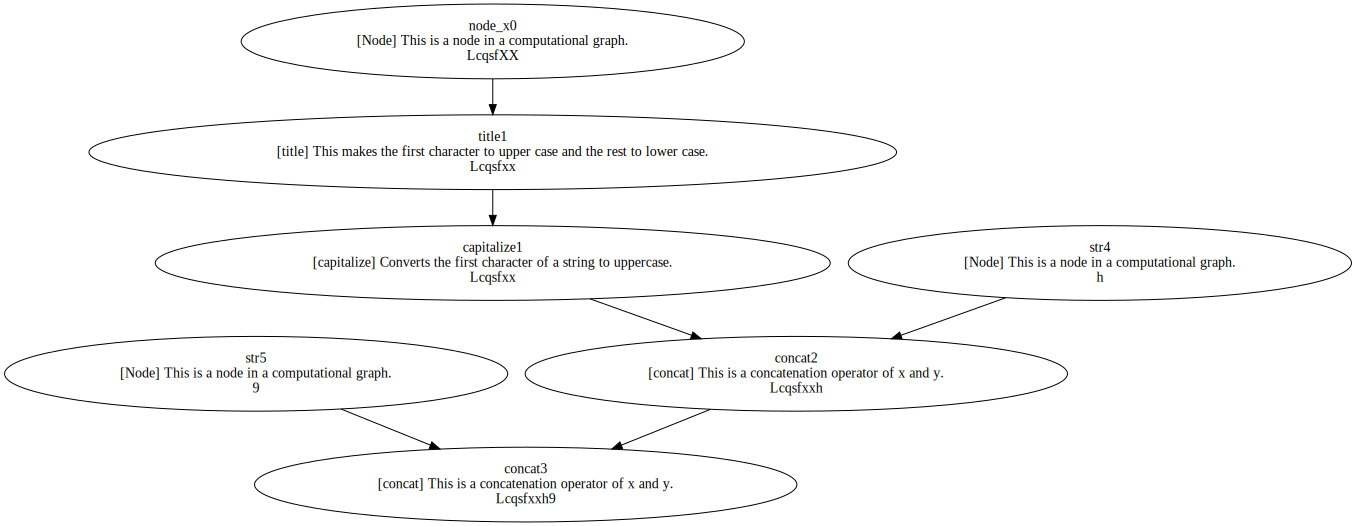

In [6]:
y.backward(visualize=True, feedback="Correct", propagate=function_propagate())

In [8]:
y.data

'Lcqsfxxh9'